# Защита данных клиентов страховой компании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Требуется разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Так же необходимо обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [2]:
try:
    data = pd.read_csv('datasets/insurance.csv')
except FileNotFoundError: 
    data = pd.read_csv('/datasets/insurance.csv')

In [3]:
data

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Описание данных:**
* **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
* **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

В таблице данных компании соблюден почти идеальный баланс между мужчинами и женщинами. Средний возраст застрахованного составляет около 31 года, при этом медиана составляет 30. Границы возраста застрахованных приводят к выводу, что компания не занимается страхованием лиц, чей возраст составляет менее 18 и старше 65 лет. Также интересно взглянуть на уровень заработной платы застрахованных - медиана составляет чуть более 40 000 рублей. В целом, в компании скорее представлен средний экономический класс, чем слишком бедные или слишком богатые граждане.  

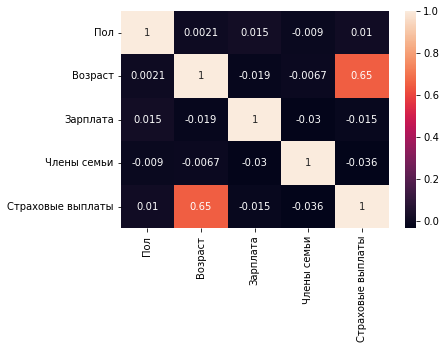

In [6]:
sns.heatmap(data.corr(), annot=True);

Дополнительно рассмотрим корреляцию. Возраст и количество страховых выплат клиенту за последние 5 лет имеют корреляцию 0.65. Вероятно, для компании есть взаимосвязь: чем старше застрахованное лицо, тем более вероятно он потребует страховку чаще, следовательно, несёт в себе больше рисков для предприятия.

Данные без пропусков и аномалий, все значения числовые, можно приступать к работе.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответьте на вопрос и обоснуйте решение.**

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
* a. Изменится. Приведите примеры матриц.
* b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

## Алгоритм преобразования

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

**Алгоритм**

Для преобразования будем умножать признаки на случаную обратимую матрицу. 

**Обоснование**

Исходя из предыдущего пункта, при умножении признаков на обратимую матрицу качество линейной регрессии не меняется. 

## Проверка алгоритма

In [6]:
# Выделяем признаки и целевой признак
features = data.drop(['Страховые выплаты'] , axis=1)
target = data['Страховые выплаты']

In [7]:
# Проверяем метрику на модели до преобразования данных
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.4249455028666801


In [8]:
# Создаем случайную матрицу 4х4 (т.к. у нас 4 признака) для умножения
array = np.random.normal(size=(4, 4))

In [9]:
array

array([[ 1.20478943,  3.39724435, -0.13849425,  0.65784909],
       [ 0.13775353,  0.72852808,  1.12330178,  0.3394636 ],
       [-1.92234791, -0.05495626,  1.35904514,  0.9616974 ],
       [ 1.5480927 ,  0.05606129,  1.95119305,  0.80384031]])

In [10]:
# Проверим, обратима ли матрица. 
try: 
    inv = np.linalg.inv(array)
except:
    print('Матрица не обратима, попробуйте еще раз.')

In [11]:
features_array = features.values

In [12]:
# Умножаем признаки на обратимую матрицу
features = features_array @ array

In [13]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))

0.42494550286669763


Метрики до умножения и после оказались равны, качество модели не нарушено, значит, такой метод подойдет для шифрования данных.